# What are the trends in Hotel Booking cancellations?

In the hotel industry, planning is key to running smooth operations and maximising revenue. However, booking cancellations can lead to lost income. By understanding what drives cancellations, hotels can adjust their policies and manage their resources better.

Cancellations happen for different reasons:

•	Hotel-related factors: type of hotel, meal options, deposit policies, and pricing. 

•	Guest characteristics: number of adults, children, or babies in the booking, nationality, booking history, deposit type, and special requests. 

•	Booking process: how far in advance the reservation was made, the month of arrival, length of stay, distribution channel, and booking changes.


In [1]:
import pandas as pd

In [2]:
#Upload Data description
data = pd.read_csv('hotel_bookings.csv')

In [3]:
#Delate irrelevant colums
columns_to_drop = ["arrival_date_year", "arrival_date_week_number", "arrival_date_day_of_month", 
                   "reserved_room_type", "assigned_room_type", "agent", "company", "days_in_waiting_list", 
                   "reservation_status", "reservation_status_date", "is_repeated_guest", "required_car_parking_spaces"]
data = data.drop(columns=columns_to_drop)


In [4]:
#Display relevant data
data

,hotel,is_canceled,lead_time,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,customer_type,adr,total_of_special_requests
0,Resort Hotel,0.0,342.0,July,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,3,No Deposit,Transient,0.00,0
1,Resort Hotel,0.0,737.0,July,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,4,No Deposit,Transient,0.00,0
2,Resort Hotel,0.0,7.0,July,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,No Deposit,Transient,75.00,0
3,Resort Hotel,0.0,13.0,July,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,No Deposit,Transient,75.00,0
4,Resort Hotel,0.0,14.0,July,0,2,2,0.0,0,BB,GBR,Online Travel Agent,Travel Agent,0,0,0,No Deposit,Transient,98.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119389,City Hotel,0.0,23.0,August,2,5,2,0.0,0,BB,BEL,Offline Travel Agent,Travel Agent,0,0,0,No Deposit,Transient,96.14,0
119390,City Hotel,0.0,102.0,August,2,5,3,0.0,0,BB,FRA,Online Travel Agent,Travel Agent,0,0,0,No Deposit,Transient,225.43,2
119391,City Hotel,0.0,34.0,August,2,5,2,0.0,0,BB,DEU,Online Travel Agent,Travel Agent,0,0,0,No Deposit,Transient,157.71,4
119392,City Hotel,0.0,109.0,August,2,5,2,0.0,0,BB,GBR,Online Travel Agent,Travel Agent,0,0,0,No Deposit,Transient,104.40,0


In [5]:
#Missing values before cleaning
print(data.isnull().sum())


hotel                               0
is_canceled                         6
lead_time                           1
arrival_date_month                 79
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            4
babies                              0
meal                                0
country                           488
market_segment                      0
distribution_channel                0
previous_cancellations              0
previous_bookings_not_canceled      0
booking_changes                     0
deposit_type                        0
customer_type                       0
adr                                 8
total_of_special_requests           0
dtype: int64


In [6]:
# Fill missing values
data["children"].fillna(0, inplace=True)
data["country"].fillna("Unknown", inplace=True)
data["adr"].fillna(data["adr"].median(), inplace=True)
data["arrival_date_month"].fillna("Unknown", inplace=True)
data["is_canceled"].fillna(data["is_canceled"].mode()[0], inplace=True) 
data["lead_time"].fillna(data["lead_time"].median(), inplace=True)


/var/folders/vp/67wjpygj1zj828cnrdtypnmr0000gn/T/ipykernel_11284/311793481.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["children"].fillna(0, inplace=True)
/var/folders/vp/67wjpygj1zj828cnrdtypnmr0000gn/T/ipykernel_11284/311793481.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

In [7]:
#Describe data to get a general idea
data.describe()

,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,adr,total_of_special_requests
count,119394.000000,119394.000000,119394.000000,119394.000000,119394.000000,119394.000000,119394.000000,119394.000000,119394.000000,119394.000000,119394.000000,119394.000000
mean,0.370412,104.010578,0.927618,2.500343,1.856400,0.103883,0.007948,0.087115,0.137092,0.221117,101.830072,0.571369
std,0.482917,106.861393,0.998606,1.908300,0.579257,0.398549,0.097435,0.844322,1.497412,0.652296,50.531480,0.792790
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000
25%,0.000000,18.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.290000,0.000000
50%,0.000000,69.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.590000,0.000000
75%,1.000000,160.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,1.000000
max,1.000000,737.000000,19.000000,50.000000,55.000000,10.000000,10.000000,26.000000,72.000000,21.000000,5400.000000,5.000000


In [8]:
import matplotlib.pyplot as plt

# HOTEL TYPE #

In [9]:
#cancellation trend by type of hotel
hotel_cancellation = data.groupby("hotel")["is_canceled"].mean() * 100
print(hotel_cancellation)

hotel
City Hotel      41.727698
Resort Hotel    27.761276
Name: is_canceled, dtype: float64


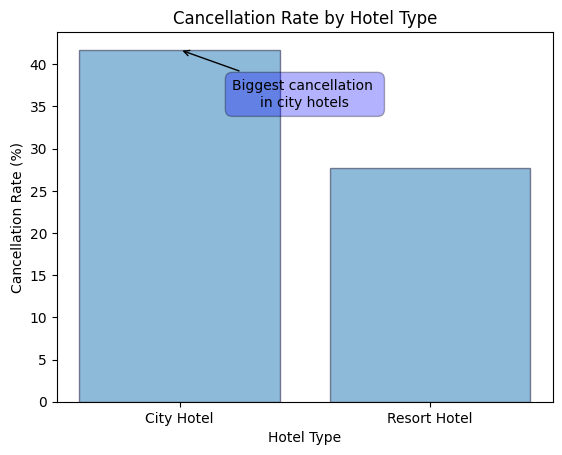

In [10]:
# Create graph
plt.bar(hotel_cancellation.index, 
        hotel_cancellation.values, 
        color="#1f77b4", 
        alpha=0.5, 
        edgecolor='#1a1233')

plt.xlabel("Hotel Type")
plt.ylabel("Cancellation Rate (%)")
plt.title("Cancellation Rate by Hotel Type")

# Annotation 
plt.annotate('Biggest cancellation \nin city hotels', 
             xy=(0, hotel_cancellation['City Hotel']),  
             xytext=(0.5, 35),  # Text position
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             ha='center',
             bbox=dict(boxstyle='round,pad=0.5', fc='blue', alpha=0.3))

plt.show()

City Hotel gets more cancellations that Resort Hotel. Suggestion: Ask in cities for higher deposits, have more costumers on waiting list to cover cancellations or overbook.

# LEADING TIME

/var/folders/vp/67wjpygj1zj828cnrdtypnmr0000gn/T/ipykernel_11284/4062952287.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  lead_time_cancellation = data.groupby("lead_time_group")["is_canceled"].mean() * 100


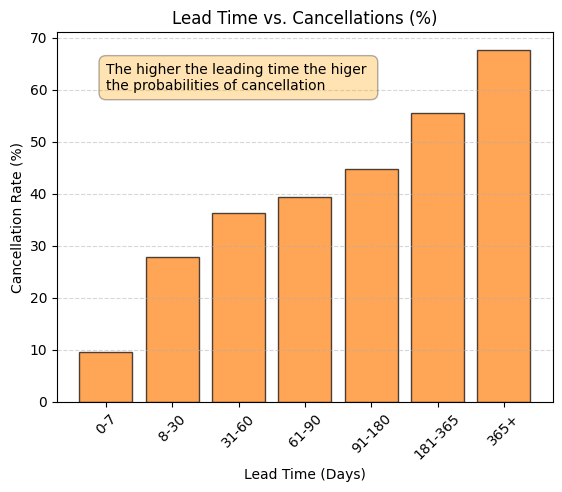

In [11]:
#relation between leading time and cancellation
# Define time intervals in days
bins = [0, 7, 30, 60, 90, 180, 365, data["lead_time"].max()]
labels = ["0-7", "8-30", "31-60", "61-90", "91-180", "181-365", "365+"]

#calculate mean
data["lead_time_group"] = pd.cut(data["lead_time"], bins=bins, labels=labels, include_lowest=True)
lead_time_cancellation = data.groupby("lead_time_group")["is_canceled"].mean() * 100

#create graph
plt.bar(lead_time_cancellation.index, lead_time_cancellation.values, color="#ff7f0e", alpha=0.7, edgecolor="black")
plt.xlabel("Lead Time (Days)")
plt.ylabel("Cancellation Rate (%)")
plt.title("Lead Time vs. Cancellations (%)")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.5)

#annotation
plt.annotate('The higher the leading time the higer \nthe probabilities of cancellation', 
             xy=(0, 0), 
             xytext=(0, 60),  # Text position
             bbox=dict(boxstyle='round,pad=0.5', fc='orange', alpha=0.3))

plt.show();

The longer the leading time the more probable the booking will be cancelled. Suggestion: don't let booking to be done with that long leading time.

# MONTH OF ARRIVAL

In [12]:
# Group by month and calculate cancellation rate
monthly_cancellation = data.groupby("arrival_date_month")["is_canceled"].mean() * 100
print (monthly_cancellation)

arrival_date_month
April        40.783535
August       37.755028
December     34.946871
February     33.349876
January      30.453855
July         37.434803
June         41.445563
March        32.130812
May          39.662340
November     31.171702
October      38.051273
September    39.168094
Unknown      60.759494
Name: is_canceled, dtype: float64


In [13]:
#putting months in order
months_order = ["January", "February", "March", "April", "May", "June", "July", 
                "August", "September", "October", "November", "December"]

In [14]:
monthly_cancellation = monthly_cancellation.reindex(months_order)

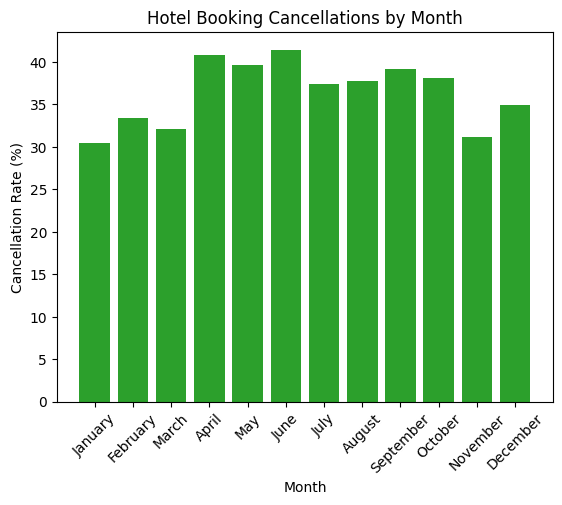

In [15]:
#create graph
plt.bar(monthly_cancellation.index, monthly_cancellation.values, color="#2ca02c")
plt.xticks(rotation=45)
plt.xlabel("Month")
plt.ylabel("Cancellation Rate (%)")
plt.title("Hotel Booking Cancellations by Month")
plt.show()

Cancellations appear relatively stable across months, with no significant seasonal trends. Although it seems more probable to ocurr in April, May and June. Suggestion: for those months have higher deposits, more costumers on waiting list to cover cancellations or overbook.  

# STAY TYPE

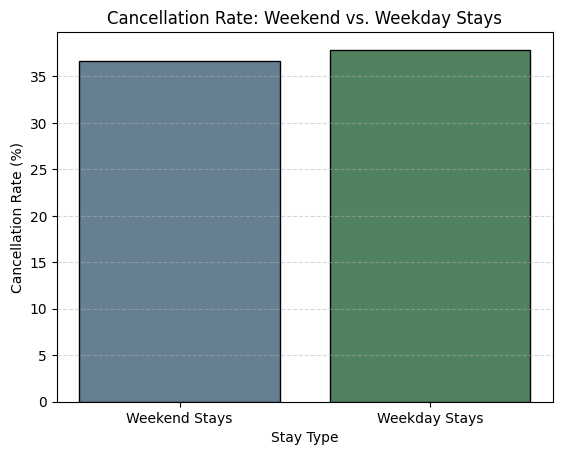

In [16]:
#Weekday vs. Weekend Stays and Cancellation
weekend_cancellation_rate = data["is_canceled"][data["stays_in_weekend_nights"] > 0].mean() * 100
weekday_cancellation_rate = data["is_canceled"][data["stays_in_week_nights"] > 0].mean() * 100

# Define categories and values
categories = ["Weekend Stays", "Weekday Stays"]
values = [weekend_cancellation_rate, weekday_cancellation_rate]

#create a graph
plt.bar(categories, values, color=['#668091', '#51825f'], edgecolor='black')
plt.xlabel("Stay Type")
plt.ylabel("Cancellation Rate (%)")
plt.title("Cancellation Rate: Weekend vs. Weekday Stays")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

There isn't a difference in cancellation between the weekend or weekdays

# ADULTS, CHILDREN AND BABIES

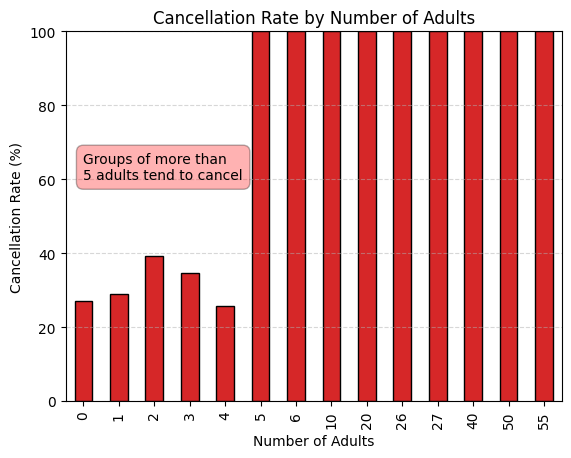

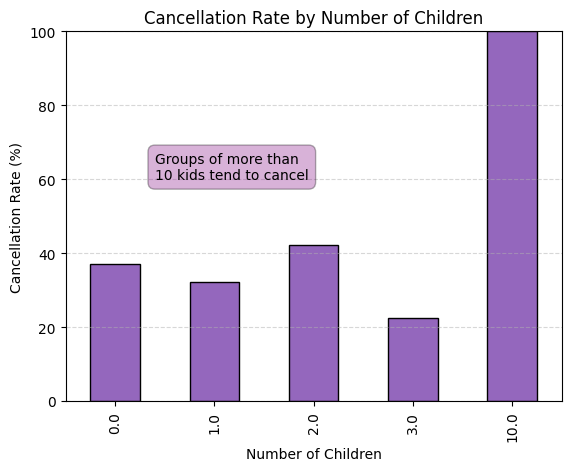

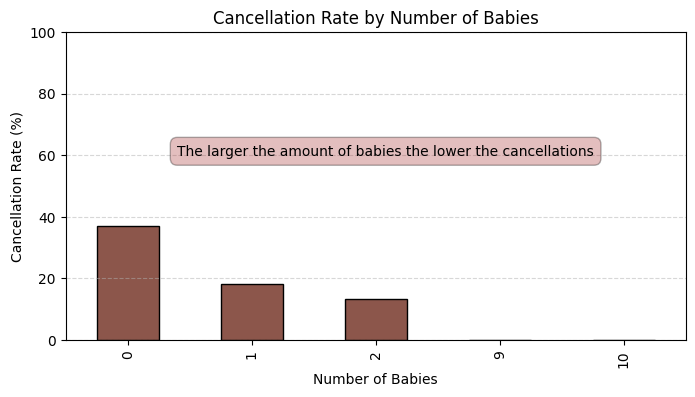

In [17]:
# Cancellation rate by number of adults
adults_cancellation_rate = data.groupby("adults")["is_canceled"].mean() * 100
adults_cancellation_rate.plot(kind="bar", color="#d62728", edgecolor="black")

plt.xlabel("Number of Adults")
plt.ylabel("Cancellation Rate (%)")
plt.title("Cancellation Rate by Number of Adults")
plt.ylim(0, 100)
plt.grid(axis="y", linestyle="--", alpha=0.5)

#annotation
plt.annotate('Groups of more than \n5 adults tend to cancel', 
             xy=(0, 5),  
             xytext=(0, 60),  # Text position
             bbox=dict(boxstyle='round,pad=0.5', fc='red', alpha=0.3))

plt.show()

# Cancellation rate by number of children in percentage
children_cancellation_rate = data.groupby("children")["is_canceled"].mean() * 100
children_cancellation_rate.plot(kind="bar", color="#9467bd", edgecolor="black")

plt.xlabel("Number of Children")
plt.ylabel("Cancellation Rate (%)")
plt.title("Cancellation Rate by Number of Children")
plt.ylim(0, 100)
plt.grid(axis="y", linestyle="--", alpha=0.5)

#annotation
plt.annotate('Groups of more than \n10 kids tend to cancel', 
             xy=(0, 5),  
             xytext=(0.4, 60),  # Text position
             bbox=dict(boxstyle='round,pad=0.5', fc='purple', alpha=0.3))             

plt.show()

# Cancellation rate by number of babies
plt.figure(figsize=(8, 4))

babies_cancellation_rate = data.groupby("babies")["is_canceled"].mean() * 100
babies_cancellation_rate.plot(kind="bar", color="#8c564b", edgecolor="black")

plt.xlabel("Number of Babies")
plt.ylabel("Cancellation Rate (%)")
plt.title("Cancellation Rate by Number of Babies")
plt.ylim(0, 100)
plt.grid(axis="y", linestyle="--", alpha=0.5)

#annotation
plt.annotate('The larger the amount of babies the lower the cancellations', 
             xy=(0, 5),  
             xytext=(0.4, 60),  # Text position
             bbox=dict(boxstyle='round,pad=0.5', fc='brown', alpha=0.3))

plt.show()


Cancellation is very high in groups of more than 5 adults, as well as groups of 10 kids. On the contary, having babies doesn't seem to lead to cancellation. Suggestion: higher deposits for more than 5 adults and/or 10 kids.

# MEAL TYPE

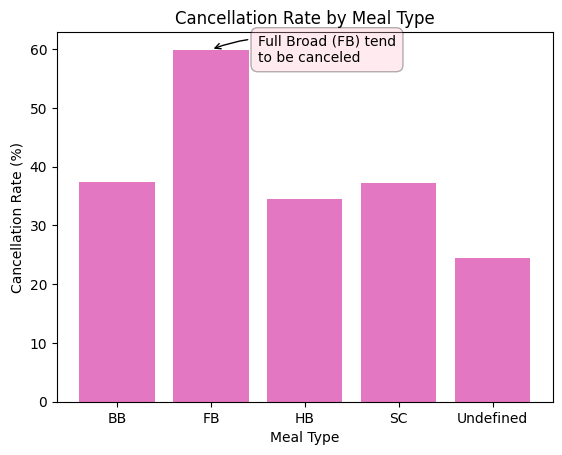

In [18]:
# meal cancellation
meal_cancellation = data.groupby("meal")["is_canceled"].mean() * 100
# graph
plt.bar(meal_cancellation.index, meal_cancellation.values, color="#e377c2")
plt.xlabel("Meal Type")
plt.ylabel("Cancellation Rate (%)")
plt.title("Cancellation Rate by Meal Type")

#annotation
fb_index = list(meal_cancellation.index).index('FB')  
plt.annotate('Full Broad (FB) tend\nto be canceled', 
             xy=(fb_index, meal_cancellation['FB']),  # Point to FB bar
             xytext=(fb_index + 0.5, meal_cancellation['FB']),  # Position text to the right
             arrowprops=dict(facecolor='black', arrowstyle='->',
                            connectionstyle="arc3,rad=0.2"),  # Curved arrow
             ha='left',  # Left-align text
             va='center',  # Center vertically
             bbox=dict(boxstyle='round,pad=0.5', fc='pink', alpha=0.3))
plt.show()


Cancellation is higher in Full Broad (includes all the meals). This is problematic as the hotel has to take into consideration the number of ingredients needed and if the booking is cancelled they still have to be consumed. Suggestion:not offering Full Broad.

# COUNTRY

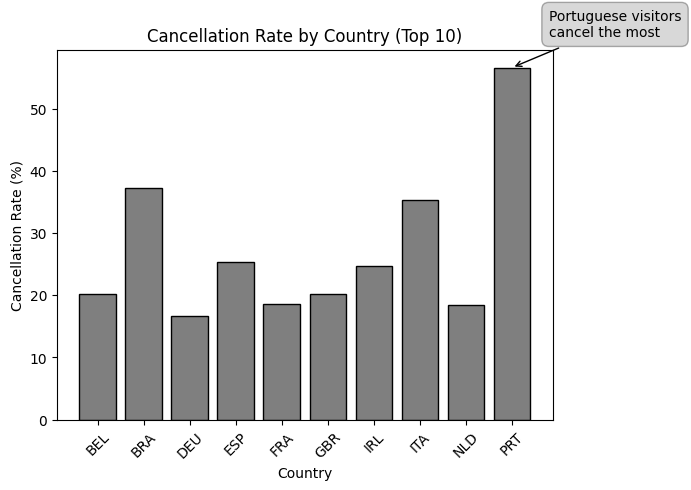

In [19]:
# Trend of cancellation depending on the country
top_countries = data["country"].value_counts().head(10).index  # Get top 10 countries
country_cancellation = data[data["country"].isin(top_countries)].groupby("country")["is_canceled"].mean() * 100  
plt.bar(country_cancellation.index, country_cancellation.values, color="#7f7f7f", edgecolor="black")
plt.xlabel("Country")
plt.ylabel("Cancellation Rate (%)")
plt.title("Cancellation Rate by Country (Top 10)")
plt.xticks(rotation=45)  

# Find Portugal's position and cancellation rate
prt_index = list(country_cancellation.index).index('PRT') 
prt_rate = country_cancellation['PRT']

# Annotation for Portugal
plt.annotate('Portuguese visitors\ncancel the most', 
             xy=(prt_index, prt_rate),  
             xytext=(prt_index + 0.8, prt_rate + 5),  
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             ha='left',
             bbox=dict(boxstyle='round,pad=0.5', fc='grey', alpha=0.3))

plt.show()

There is a high cancellation rates specially from Portuguese, Brasilians and Italians. Suggestion: higher deposits for costumers with this nationalities.

# MARKET AND DISTRIBUTION

In [20]:
# Fix repeated names
data["market_segment"].replace({"Online Travel Agent": "Online travel agent"}, inplace=True)

data["distribution_channel"].replace({"Travel Agents": "travel agents"}, inplace=True)

# Save the cleaned dataset 
data.to_csv("hotel_bookings_cleaned.csv", index=False)

/var/folders/vp/67wjpygj1zj828cnrdtypnmr0000gn/T/ipykernel_11284/363857818.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["market_segment"].replace({"Online Travel Agent": "Online travel agent"}, inplace=True)
/var/folders/vp/67wjpygj1zj828cnrdtypnmr0000gn/T/ipykernel_11284/363857818.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate 

In [21]:
# Remove undefined market segments from the stadistic
filtered_data = data[ (data["market_segment"].str.lower() != "undefined") & 
                     (data["distribution_channel"].str.lower() != "undefined")]

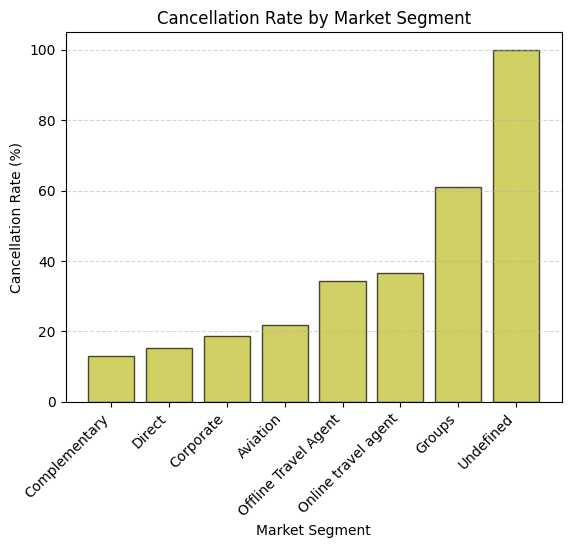

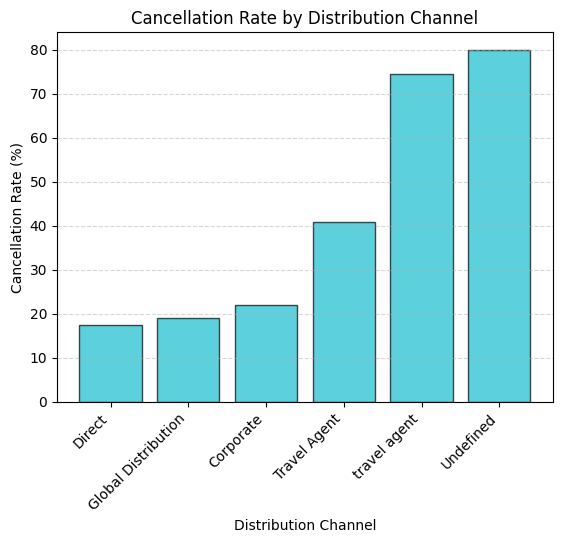

In [22]:
# Market Segment & Distribution Channel
segment_cancellation = data.groupby("market_segment")["is_canceled"].mean().sort_values() * 100
channel_cancellation = data.groupby("distribution_channel")["is_canceled"].mean().sort_values() * 100

#Display data Market Segment
plt.bar(segment_cancellation.index, segment_cancellation.values, color="#bcbd22", alpha=0.7, edgecolor='black')
plt.xlabel("Market Segment")
plt.ylabel("Cancellation Rate (%)")
plt.title("Cancellation Rate by Market Segment")
plt.xticks(rotation=45, ha='right')  
plt.grid(axis='y', linestyle='--', alpha=0.5)  
plt.show()

# Display data Distribution Channel
plt.bar(channel_cancellation.index, channel_cancellation.values, color="#17becf", alpha=0.7, edgecolor='black')
plt.xlabel("Distribution Channel")
plt.ylabel("Cancellation Rate (%)")
plt.title("Cancellation Rate by Distribution Channel")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

The highest cancellation comes from Groups and Online Travel Agents. Suggestion: higher deposits. The most cancelled ditribution channel is through travel agents. Suggestion: higher deposit. There is a high number of undefined data, if the hotel wants to have more accurate data it is needed to keep track of all the information.

# PREVIOUS BOOKINGS

/var/folders/vp/67wjpygj1zj828cnrdtypnmr0000gn/T/ipykernel_11284/1624374628.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cancellation_rates = data.groupby("previous_bookings_range")["is_canceled"].mean() * 100


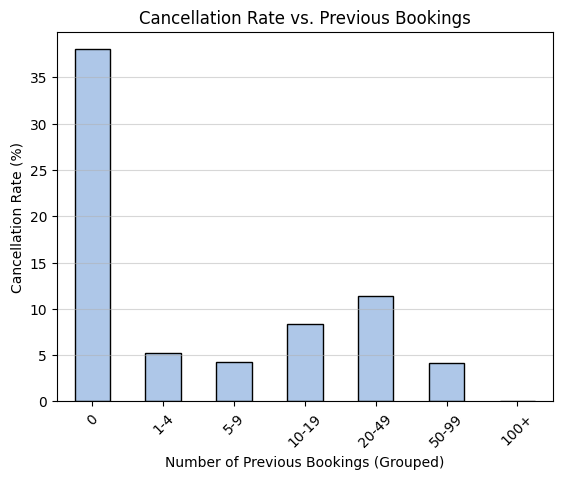

In [23]:
# Relation between previous bookings (canceled and uncancelled) and cancellation
# Group previous bookings into meaningful categories
bins = [0, 1, 5, 10, 20, 50, 100, max(101, data["previous_bookings_not_canceled"].max() + 1)]
labels = ["0", "1-4", "5-9", "10-19", "20-49", "50-99", "100+"]

data["previous_bookings_range"] = pd.cut(data["previous_bookings_not_canceled"], bins=bins, labels=labels, right=False)

# Calculate cancellation percentage per group
cancellation_rates = data.groupby("previous_bookings_range")["is_canceled"].mean() * 100  

# Graph
cancellation_rates.sort_index(ascending=True).plot(kind="bar", color="#aec7e8", edgecolor="black")
plt.xlabel("Number of Previous Bookings (Grouped)")
plt.ylabel("Cancellation Rate (%)")
plt.title("Cancellation Rate vs. Previous Bookings")
plt.xticks(rotation=45)
plt.grid(axis="y", alpha=0.5)
plt.show()

The larger amount of previous bookings not cancelled the lower the cancellation rate. Suggestion: discounts for people who has come before.

# BOOKING CHANGES 

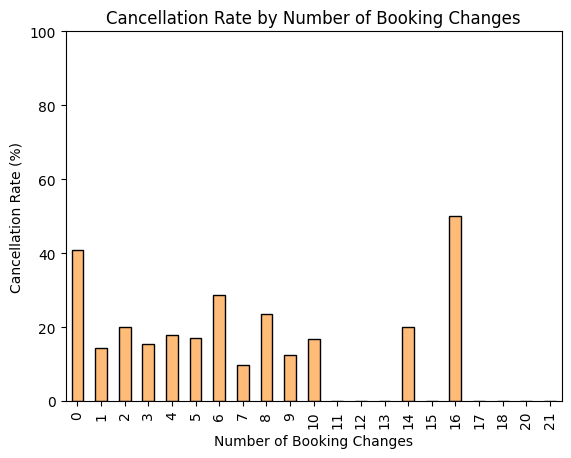

In [24]:
# Booking changes and cencellation
cancellation_rates = data.groupby("booking_changes")["is_canceled"].mean().sort_index() * 100
#Graph
cancellation_rates.plot(kind="bar", color="#ffbb78", edgecolor="black")
plt.xlabel("Number of Booking Changes")
plt.ylabel("Cancellation Rate (%)")
plt.title("Cancellation Rate by Number of Booking Changes")
plt.ylim(0, 100)
plt.show()

No booking changes and too many booking changes are related with booking cancellations: Suggestion: limit the number of changes to 15.

# DEPOSIT TYPE

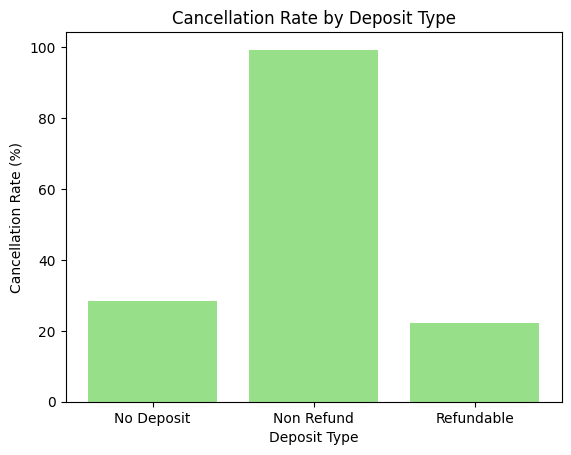

In [25]:
# Deposit type and cancellation
deposit_cancellation = data.groupby("deposit_type")["is_canceled"].mean() * 100

#Graph
plt.bar(deposit_cancellation.index, deposit_cancellation.values, color="#98df8a")
plt.xlabel("Deposit Type")
plt.ylabel("Cancellation Rate (%)")
plt.title("Cancellation Rate by Deposit Type")
plt.show()


Non Refund deposit type seem to foment cancellation. Suggestion: refundable deposits foment the consumer to keep the booking while there is still a save deposit fro the hotel.

# COSTUMER TYPE

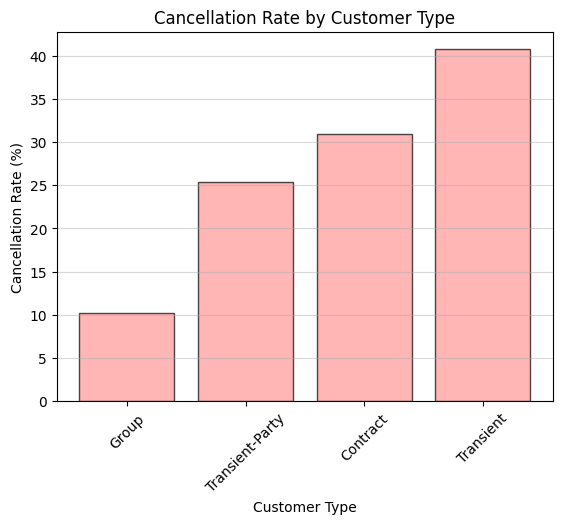

In [26]:
# Relation cancellation and costumer type
customer_cancellation = data.groupby("customer_type")["is_canceled"].mean().sort_values() * 100

# Results
plt.bar(customer_cancellation.index, customer_cancellation.values, color="#ff9896", alpha=0.7, edgecolor='black')
plt.xlabel("Customer Type")
plt.ylabel("Cancellation Rate (%)")
plt.title("Cancellation Rate by Customer Type")
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.grid(axis='y', alpha=0.5)  
plt.show()

Transient costumers are more likely to cancell. Suggestion: higher deposit.

# ADR

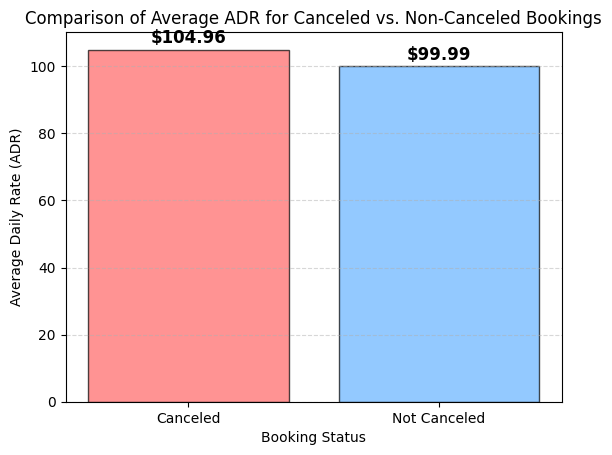

In [27]:
#Relation between cancellation and ADR
#Average ADR cancelled vs not cancelled
avg_adr_canceled = data[data["is_canceled"] == 1]["adr"].mean()
avg_adr_not_canceled = data[data["is_canceled"] == 0]["adr"].mean()

#Create graph
categories = ["Canceled", "Not Canceled"]
values = [avg_adr_canceled, avg_adr_not_canceled]
plt.bar(categories, values, color=["#ff6666", "#66b3ff"], alpha=0.7, edgecolor="black")
plt.xlabel("Booking Status")
plt.ylabel("Average Daily Rate (ADR)")
plt.title("Comparison of Average ADR for Canceled vs. Non-Canceled Bookings")
for i, v in enumerate(values):
    plt.text(i, v + 2, f"${v:.2f}", ha="center", fontsize=12, fontweight="bold")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()

There isn't  a big difference between the average ADR of canceled bookings vs uncanceled.

# SPECIAL REQUEST

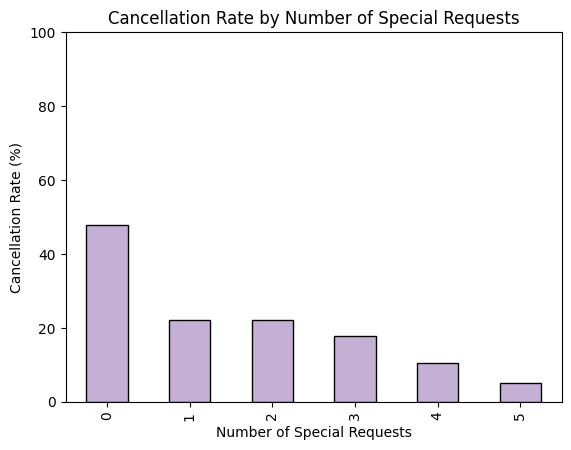

In [28]:
# Cancellation rate %
cancellation_rates = data.groupby("total_of_special_requests")["is_canceled"].mean().sort_index() * 100

# Graph
cancellation_rates.plot(kind="bar", color="#c5b0d5", edgecolor="black")
plt.xlabel("Number of Special Requests")
plt.ylabel("Cancellation Rate (%)")
plt.title("Cancellation Rate by Number of Special Requests")
plt.ylim(0, 100)  # Keep scale consistent
plt.show()

It shows clearly that is more probable that the larger amount of special requests can reduce booking cancellation as it gives a more personalised experience. Suggestion: foment the user peronalise their experience with special requests.

# CONCLUSION

Remove ADR and Type of Stay as it has proven not to be a significant difference between canceled bookings and non canceled.

/var/folders/vp/67wjpygj1zj828cnrdtypnmr0000gn/T/ipykernel_11284/1083085455.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  "Lead Time": data.groupby("lead_time_group")["is_canceled"].mean() * 100,
/var/folders/vp/67wjpygj1zj828cnrdtypnmr0000gn/T/ipykernel_11284/1083085455.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  "Previous Bookings": data.groupby("previous_bookings_range")["is_canceled"].mean() * 100,


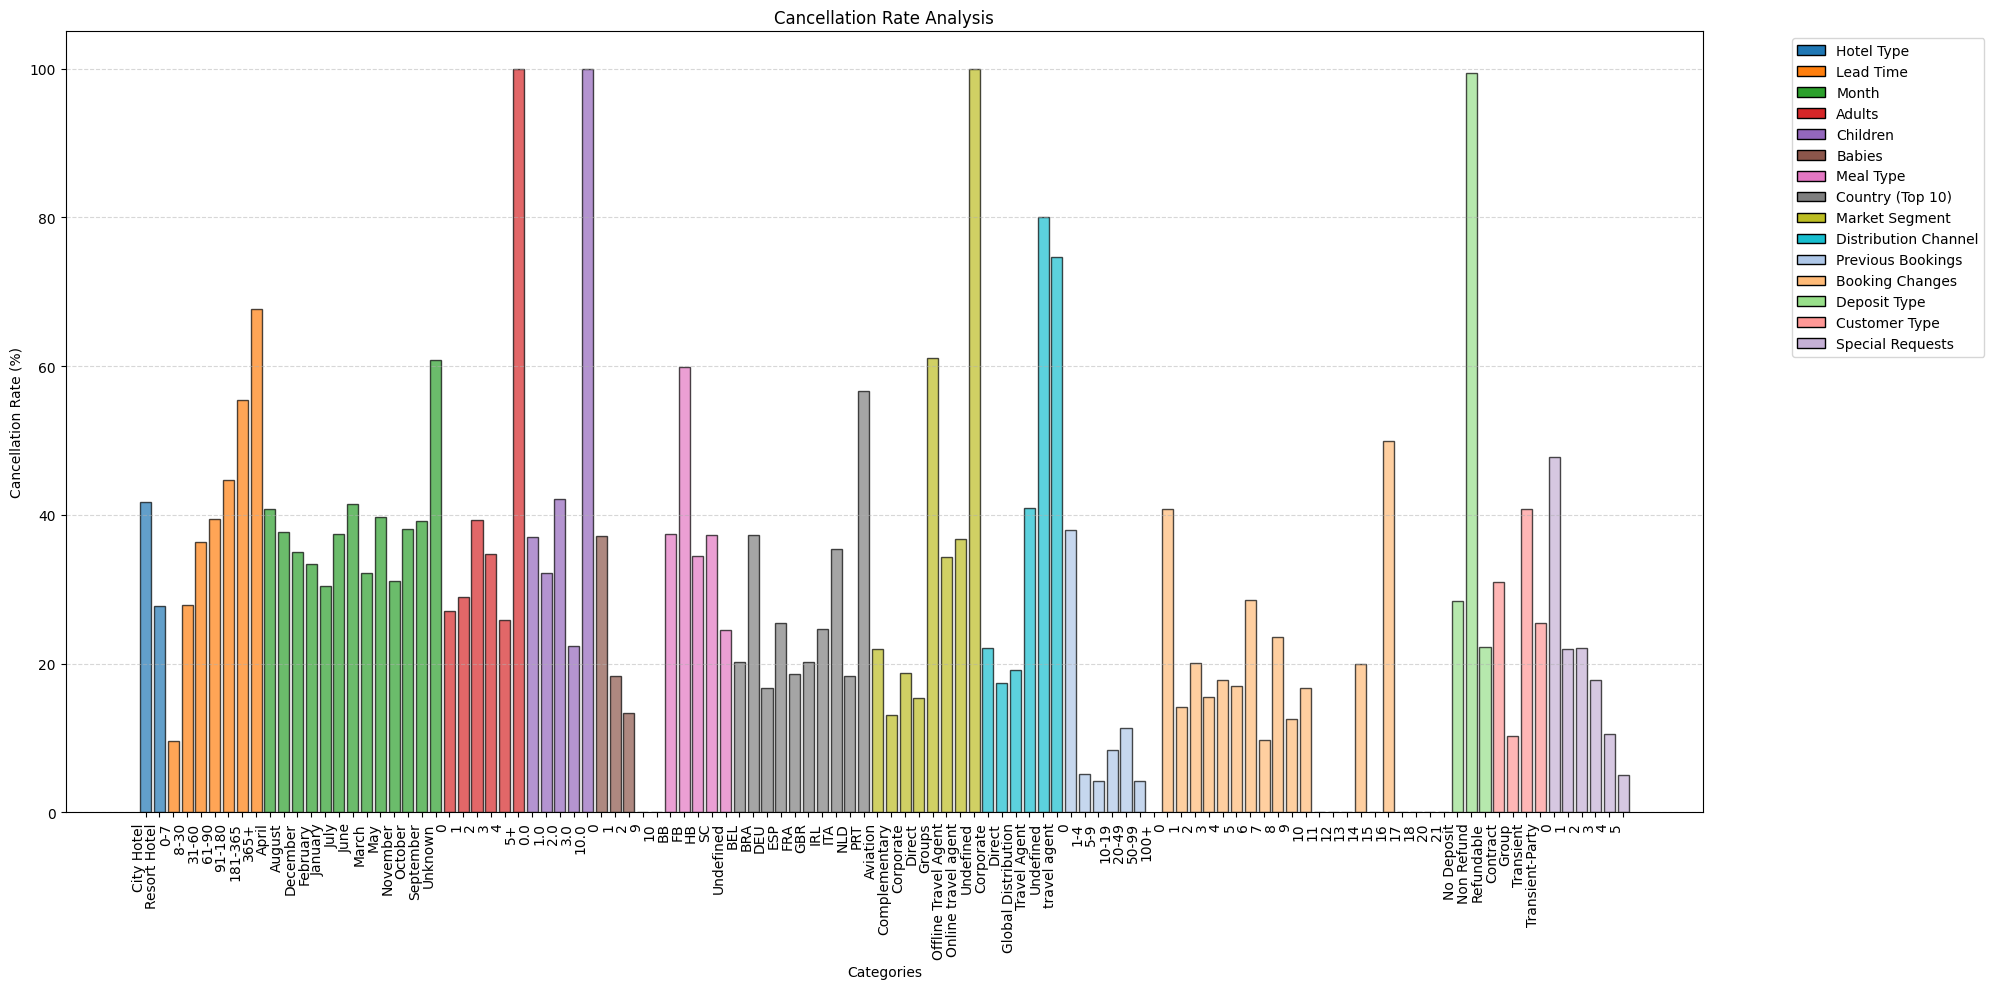

In [29]:
# Group adults +5
data['adults_grouped'] = data['adults'].apply(lambda x: '5+' if x > 4 else str(x))

# Categories
categories = {
    "Hotel Type": data.groupby("hotel")["is_canceled"].mean() * 100,
    "Lead Time": data.groupby("lead_time_group")["is_canceled"].mean() * 100,
    "Month": data.groupby("arrival_date_month")["is_canceled"].mean() * 100,
    "Adults": data.groupby("adults_grouped")["is_canceled"].mean() * 100,  # Use the grouped column
    "Children": data.groupby("children")["is_canceled"].mean() * 100,
    "Babies": data.groupby("babies")["is_canceled"].mean() * 100,
    "Meal Type": data.groupby("meal")["is_canceled"].mean() * 100,
    "Country (Top 10)": data[data["country"].isin(data["country"].value_counts().head(10).index)]
                          .groupby("country")["is_canceled"].mean() * 100,
    "Market Segment": data.groupby("market_segment")["is_canceled"].mean() * 100,
    "Distribution Channel": data.groupby("distribution_channel")["is_canceled"].mean() * 100,
    "Previous Bookings": data.groupby("previous_bookings_range")["is_canceled"].mean() * 100,
    "Booking Changes": data.groupby("booking_changes")["is_canceled"].mean() * 100,
    "Deposit Type": data.groupby("deposit_type")["is_canceled"].mean() * 100,
    "Customer Type": data.groupby("customer_type")["is_canceled"].mean() * 100,
    "Special Requests": data.groupby("total_of_special_requests")["is_canceled"].mean() * 100,}

# Color palette
category_colors = {
    "Hotel Type": "#1f77b4",  
    "Lead Time": "#ff7f0e",   
    "Month": "#2ca02c",       
    "Adults": "#d62728",      
    "Children": "#9467bd",   
    "Babies": "#8c564b",     
    "Meal Type": "#e377c2",   
    "Country (Top 10)": "#7f7f7f",  
    "Market Segment": "#bcbd22",    
    "Distribution Channel": "#17becf",  
    "Previous Bookings": "#aec7e8",  
    "Booking Changes": "#ffbb78",    
    "Deposit Type": "#98df8a",       
    "Customer Type": "#ff9896",      
    "Special Requests": "#c5b0d5",}

#Prepare data 
x_labels = []
cancellation_rates = []
colors = []
category_indices = []  # Keep track of which category each bar belongs to

# Assign a unique index to each category
category_to_index = {category: i for i, category in enumerate(categories.keys())}

for category, rates in categories.items():
    for label, rate in rates.items():
        x_labels.append(label)  
        cancellation_rates.append(rate)
        colors.append(category_colors[category])
        category_indices.append(category_to_index[category])  # Store the category index

# Bar chart
fig, ax = plt.subplots(figsize=(20, 10))
bars = ax.bar(range(len(x_labels)), cancellation_rates, color=colors, alpha=0.7, edgecolor='black')

# Label the graph
ax.set_xlabel("Categories")
ax.set_ylabel("Cancellation Rate (%)")
ax.set_title("Cancellation Rate Analysis")

# Set x-axis ticks and labels
ax.set_xticks(range(len(x_labels)))
ax.set_xticklabels(x_labels, rotation=90, ha='right')

# Add gridlines
plt.grid(axis='y', linestyle='--', alpha=0.5)

#  Legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=color, edgecolor='black', label=category) 
                   for category, color in category_colors.items()]
ax.legend(handles=legend_elements, bbox_to_anchor=(1.05, 1), loc='upper left')

# Layout
plt.tight_layout()
plt.show()

This graph shows all the data in a single graph. However, the data is diplay very small, making it difficult to visualise. Furthermore, the diference in porcentages doesn't show the categories with the same relevance equaly. There should be a better way to display the results of each category.

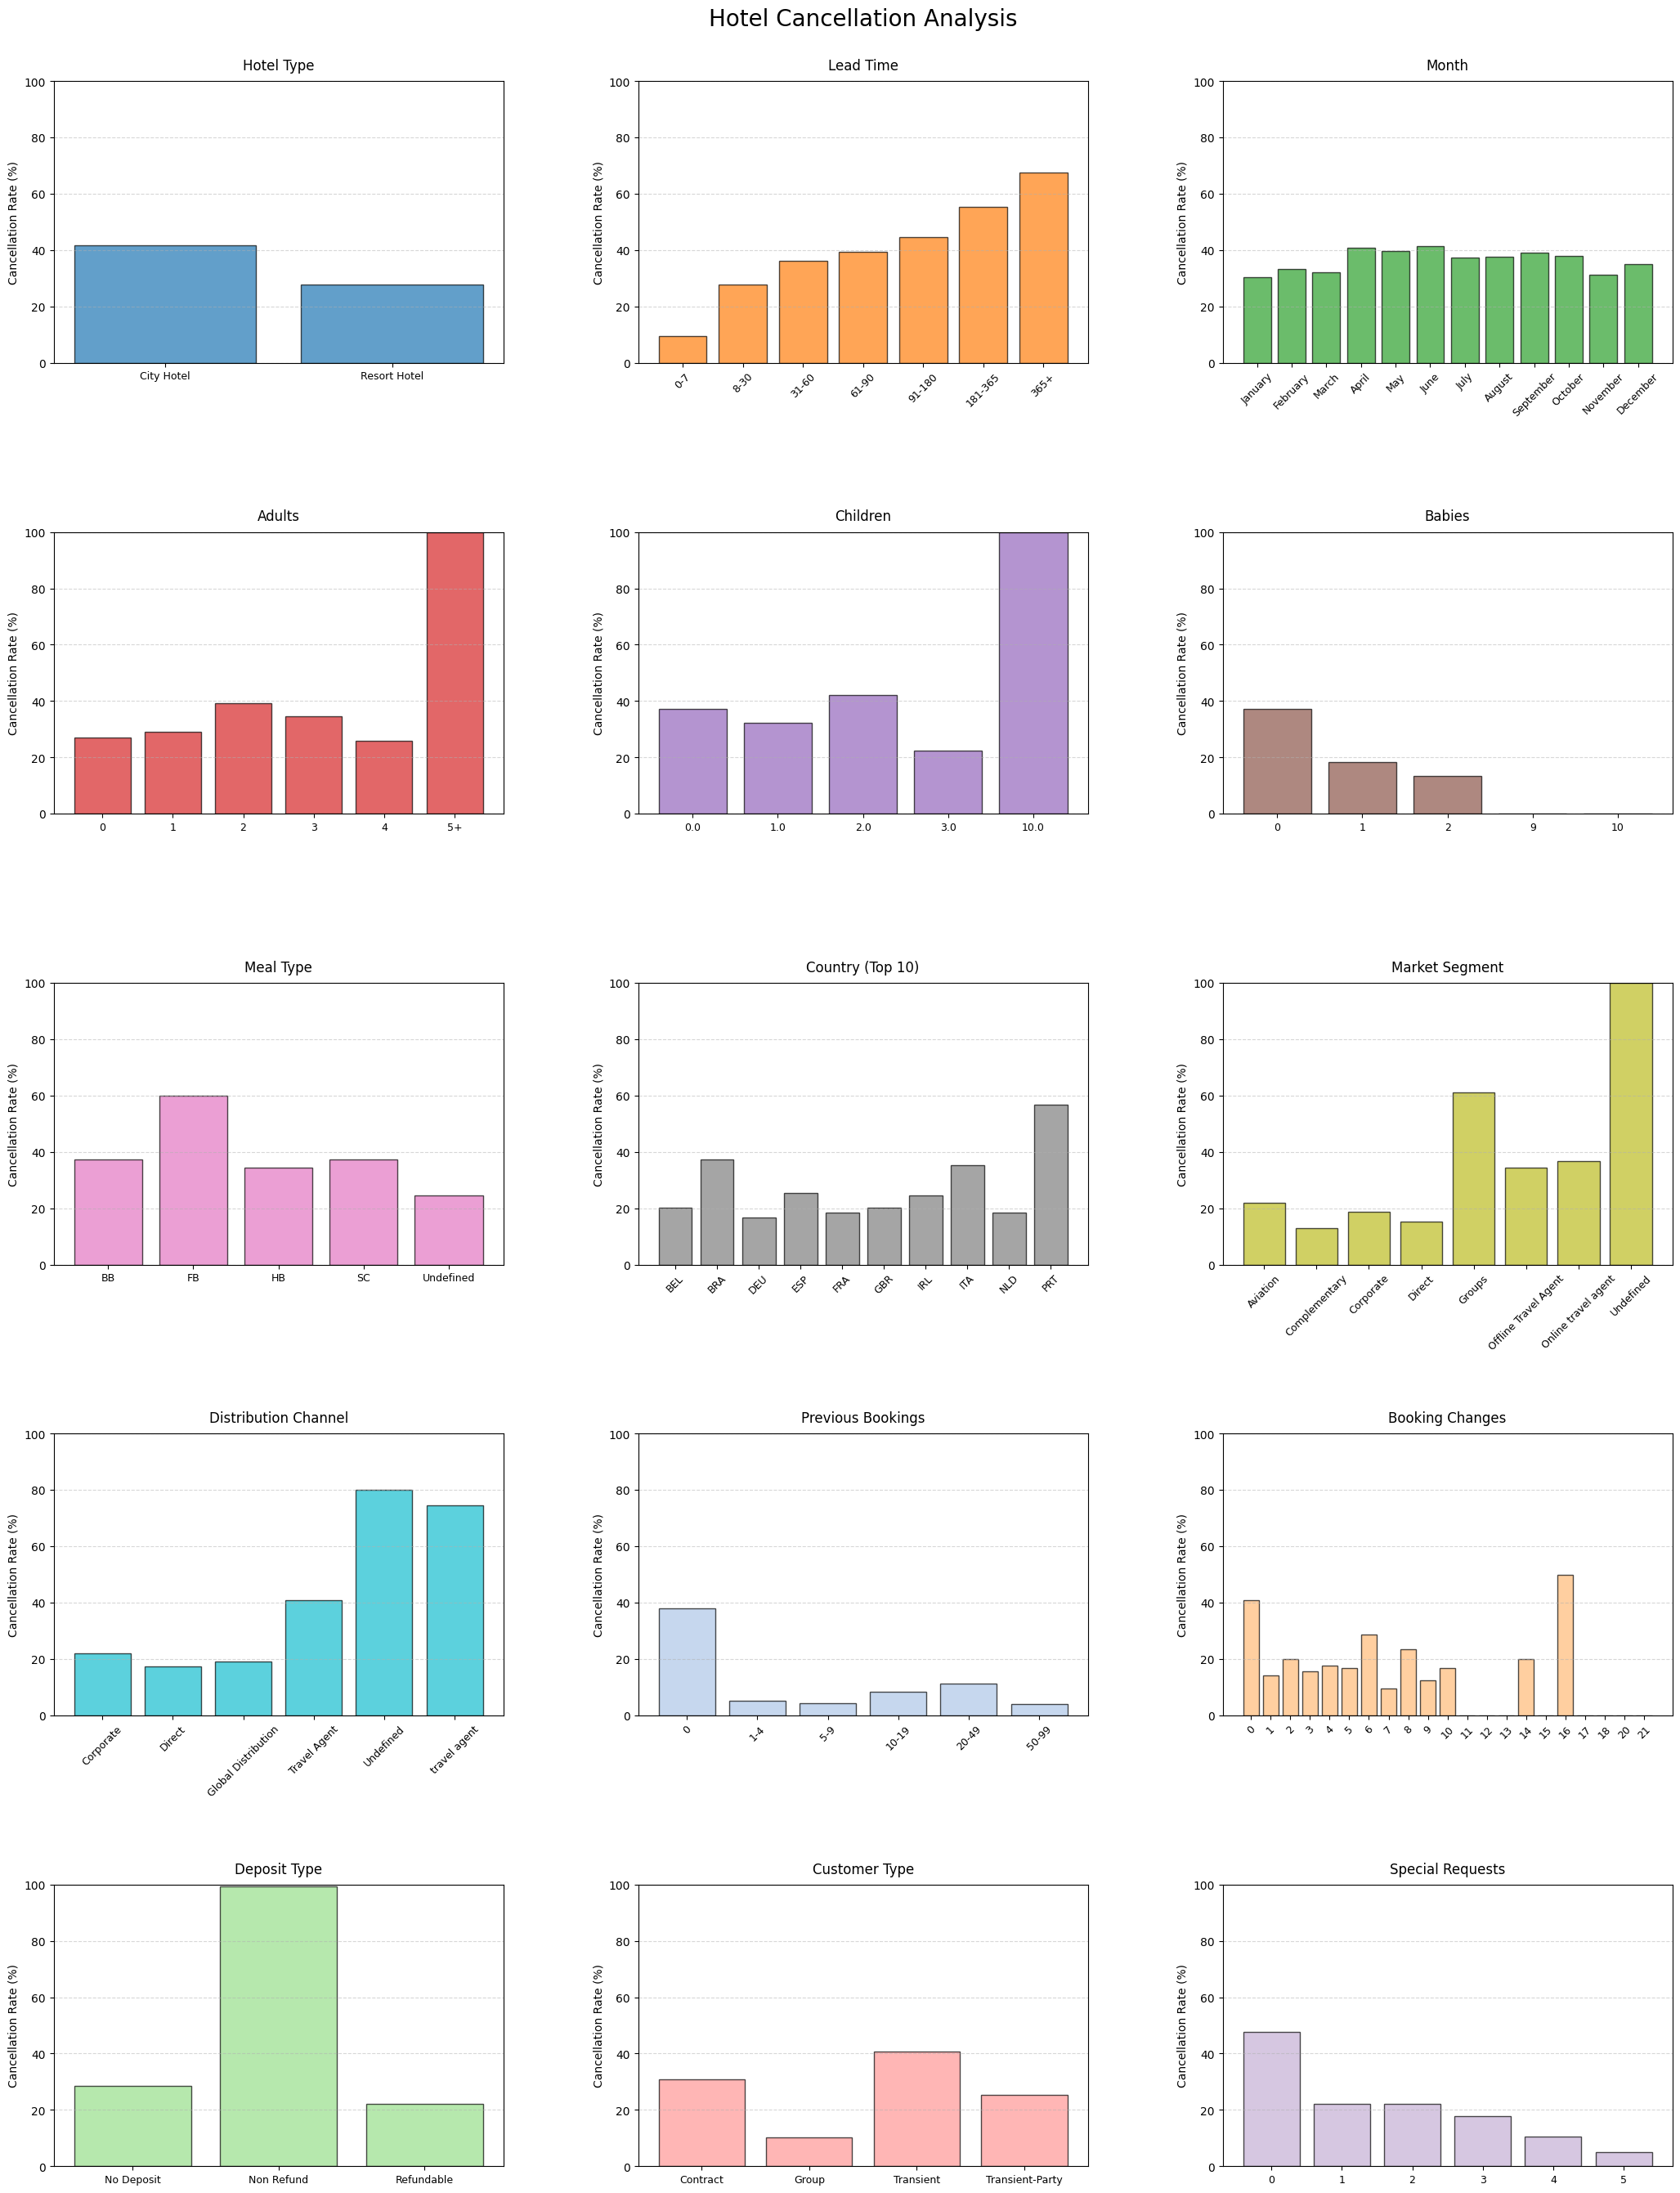

In [30]:
# Create figure with proper spacing
fig = plt.figure(figsize=(22, 30))
fig.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.1, hspace=0.6, wspace=0.4)
fig.suptitle("Hotel Cancellation Analysis", fontsize=20, y=0.98)

# Create a 5x3 grid
grid = plt.GridSpec(5, 3, figure=fig, hspace=0.6, wspace=0.3)

# Plot positions
plot_positions = [
    (0, 0),  # Hotel Type
    (0, 1),  # Lead Time
    (0, 2),  # Month
    (1, 0),  # Adults
    (1, 1),  # Children
    (1, 2),  # Babies
    (2, 0),  # Meal Type
    (2, 1),  # Country
    (2, 2),  # Market Segment
    (3, 0),  # Distribution Channel
    (3, 1),  # Previous Bookings
    (3, 2),  # Booking Changes
    (4, 0),  # Deposit Type
    (4, 1),  # Customer Type
    (4, 2),  # Special Requests
]

# Plot each category
for (row, col), (category, rates) in zip(plot_positions, categories.items()):
    ax = fig.add_subplot(grid[row, col])
    
    # Sort time-based categories
    if category == "Month":
        months_order = ["January", "February", "March", "April", "May", "June", 
                       "July", "August", "September", "October", "November", "December"]
        rates = rates.reindex(months_order)
    elif category == "Lead Time":
        rates = rates.sort_index()
    
    bars = ax.bar(rates.index.astype(str), rates.values, 
                 color=category_colors[category], alpha=0.7, edgecolor='black')
    ax.set_title(category, pad=10, fontsize=12)
    ax.set_ylabel("Cancellation Rate (%)", fontsize=10)
    ax.grid(axis='y', linestyle='--', alpha=0.5)
    
    # Rotate x-axis labels for certain categories
    if category in ["Lead Time", "Month", "Country (Top 10)", "Market Segment", 
                   "Distribution Channel", "Previous Bookings", "Booking Changes"]:
        ax.tick_params(axis='x', rotation=45, labelsize=9)
    else:
        ax.tick_params(axis='x', labelsize=9)
    
    # Set consistent y-axis
    ax.set_ylim(0, 100)

plt.show()

The data displayed on the following page shows the percentage of cancellations in each category. The data shows that the biggest trends are: 

1-	City Hotels over Resort Hotels.

2-	Bookings with long lead time.

3-	Groups of more than five adults.

4-	A large number of kids (10).

5-	Full Board Meal Plan.

6-	Portuguese, Brazilian, and Italian.

7-	Groups.

8-	Bookings made through Travel Companies.

9-	First-time clients.

10-	Either no booking changes or too many (16)

11-	No refundable deposit.

12-	No special request.


The data highlights key trends in booking cancellations and how hotels can minimise their impact. There are two main ways to tackle this issue: adjusting customer policies and refining hotel operations.  

On the customer side, hotels can set deposit amounts based on cancellation risk. For example, higher deposits could be required for groups of seven adults, Portuguese guests, or those booking through travel agents, since they tend to cancel more frequently. On the other hand, families with babies or repeat visitors, who are less likely to cancel, could be offered lower deposits as an incentive to book.  

Operational changes can also help reduce cancellations. Hotels might shorten the lead time by only allowing bookings closer to the check-in date, limit Full Board options, encourage special requests (as customers with requests tend to cancel less), restrict the number of booking changes, and ensure deposits are refundable.  

By making these adjustments, hotels can lower cancellation rates, improve booking stability, and reduce unnecessary costs.

Overall mark: 58

#### Business Question:
A relevent business question is stated, though not that clear. Consider to rephrase the question to make it more understandable. The significance of anwering the question is explained. Comprehensive evidences are provided to derive the findings and implications. However, it seems that not all evideces contribute to the analysis and the implications. Actionable advices are provided to the hotel industry, which is data-supported.

<u>Good</u>

#### Data:
It seems that many variables are used in the code, however, they are not introduced explicitly in the report. In addition, the rationale of choosing the variables needs to be presented as well. Improvements could include explicitly limit the data analysis into a certain list of key variables (3-5 variables is reasonable) to make it concise. Appropriate data filtering and data grouping are used, showing good understanding of the data manipulation.

<u>Good</u>

#### Visualization:
Many plots are presented for the visualization purpose, and most of them are bar charts. All bar charts come with the essential elements of titles, axis labels and ticks. Annotations are also displayed, but they are not really meaningful, as it is straightforward to tell the maximum/ minimum in a bar chart. Consider to add annotations for more insightful findings from the plot. Also, for the overall bar chart, the readability is not that good. Further improvements could include using different plot types, e.g. pie chart, time-series, to make the visualization more comprehensive.

<u>Good</u>

#### Code:
The code is error-free, though the structure is a bit messy. Necessary comments are available, but the description in the comments are generic. Consider to provide more specific comments where necessary to improve the readability. You can also safely omit those exploratory code that does not contribute to the analysis.

<u>Good</u>